In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class Net(nn.Module):
    
    def __init__(self, ip, h, op, p=0):
        super(Net, self).__init__()
        self.drop = nn.Dropout(p=p)
        self.linear1 = nn.Linear(ip, h)
        self.linear2 = nn.Linear(h, h)
        self.linear3 = nn.Linear(h, op)
    
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.drop(x)
        x = torch.relu(self.linear2(x))
        x = self.drop(x)
        x = self.linear3(x)
        return x

In [18]:
class Data(Dataset):
    
    # Constructor
    def __init__(self, N_SAMPLES=40, noise_std=0.2, train=True):
        self.x = torch.linspace(-1, 1, N_SAMPLES).view(-1, 1)
        self.f = self.x ** 2
        if train != True:
            torch.manual_seed(1)
            self.y = self.f + noise_std * torch.randn(self.f.size())
            self.y = self.y.view(-1, 1)
            torch.manual_seed(0)
        else:
            self.y = self.f + noise_std * torch.randn(self.f.size())
            self.y = self.y.view(-1, 1)
            
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot(self):
        plt.figure(figsize = (6.1, 10))
        plt.scatter(self.x.numpy(), self.y.numpy(), label="Samples")
        plt.plot(self.x.numpy(), self.f.numpy() ,label="True Function", color='orange')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((-1, 1))
        plt.ylim((-2, 2.5))
        plt.legend(loc="best")
        plt.show()

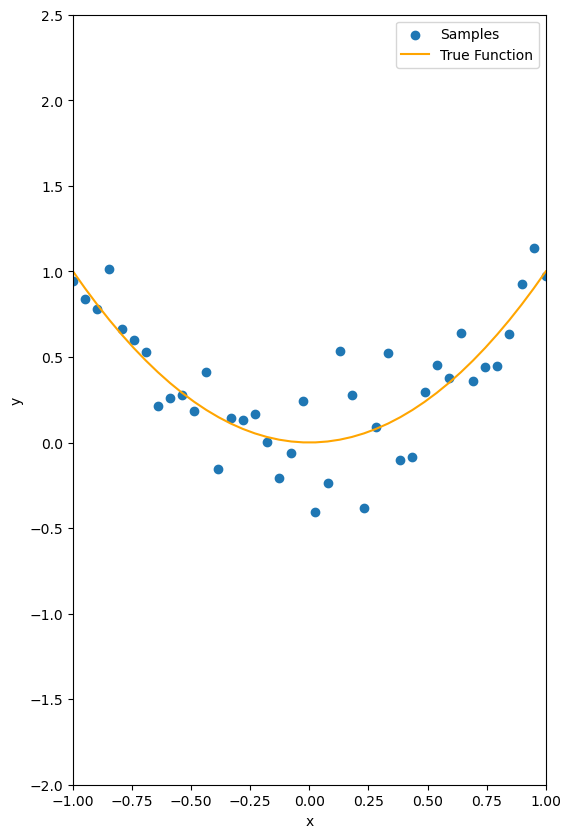

In [19]:
ds = Data()
ds.plot()

In [37]:
model = Net(1, 300, 1)
model_drop = Net(1, 300, 1, p=0.5)

op = optim.Adam(model.parameters(), lr = 0.01)
op_drop = optim.Adam(model_drop.parameters(), lr = 0.01)

criterion = nn.MSELoss()

In [38]:
def train(epochs):
    
    for epoch in range(epochs):
        
        yhat = model(ds.x)
        yhat_drop = model_drop(ds.x)
        loss = criterion(yhat, ds.y)
        loss_drop = criterion(yhat_drop, ds.y)
        
        op.zero_grad()
        op_drop.zero_grad()
        loss.backward()
        loss_drop.backward()
        op.step()
        op_drop.step()

In [39]:
model_drop.train()

Net(
  (drop): Dropout(p=0.5, inplace=False)
  (linear1): Linear(in_features=1, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=1, bias=True)
)

In [40]:
train(500)

In [41]:
model_drop.eval()

Net(
  (drop): Dropout(p=0.5, inplace=False)
  (linear1): Linear(in_features=1, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=1, bias=True)
)

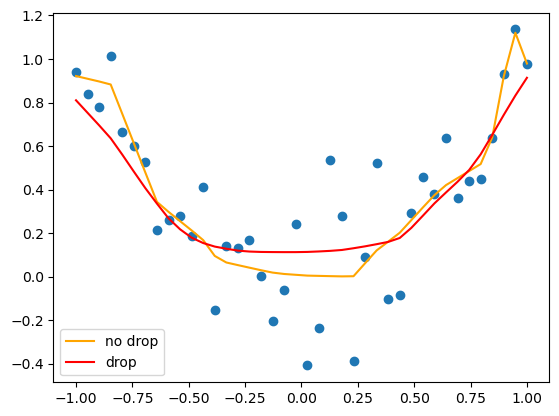

In [42]:
yhat = model(ds.x)
yhat_drop = model_drop(ds.x)

plt.scatter(ds.x, ds.y)
plt.plot(ds.x, yhat.detach().numpy(), label = 'no drop', c='orange')
plt.plot(ds.x, yhat_drop.detach().numpy(), label = 'drop', c='r')
plt.legend()
plt.show()